In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

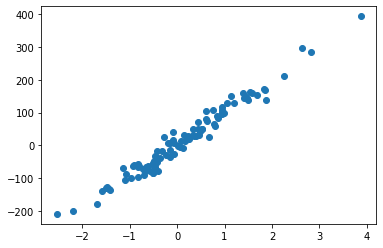

In [112]:
X,y=make_regression(n_samples=100, n_features=1, noise=20)
plt.scatter(X,y)

## 以梯度下降找出回歸線

In [95]:
#Parameters
alpha=0.001 #learning rate
repeats=1000

#Initializing variables
w0=0
w1=0
errors=[]
points=[]

w0: 2.227159
w1: 34.856849


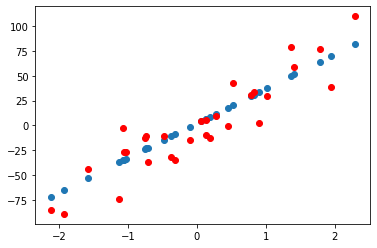

In [96]:
for j in range(repeats):
    error_sum=0
    squared_error_sum=0
    error_sum_x=0
    for i in range(len(X_train)):
        predict=w0+(X_train[i]*w1)
        squared_error_sum=squared_error_sum+(y_train[i]-predict)**2
        error_sum=error_sum+y_train[i]-predict
        error_sum_x=error_sum_x+(y_train[i]-predict)*X_train[i]
    w0=w0+(alpha*error_sum)
    w1=w1+(alpha*error_sum_x)
    errors.append(squared_error_sum/len(X_train))

print('w0: %2f' %w0)
print('w1: %2f' %w1)
predicts=[]
mean_error=0
for i in range(len(X_test)):
    predict=w0+(X_test[i]*w1)
    predicts.append(predict)
plt.scatter(X_test,predicts)
plt.scatter(X_test, y_test, color='red')
plt.show()

## 1.簡單線性回歸

Intercept:  1.6874139005268738
Cofficient:  [100.05101042]
訓練集預R2 0.9722010678008078
測試集預測結果R2 0.9467651135504442


numpy.ndarray

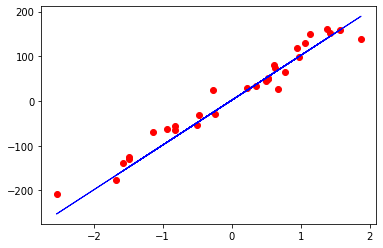

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regr=linear_model.LinearRegression() 
regr.fit(X_train, y_train)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, regr.predict(X_test),color='blue',linewidth=1)

print("Intercept: ",regr.intercept_)
print("Cofficient: ",regr.coef_)
print("訓練集預R2",regr.score(X_train,y_train))
print("測試集預測結果R2",regr.score(X_test,y_test))
type(X_train)

## 2.多項式回歸

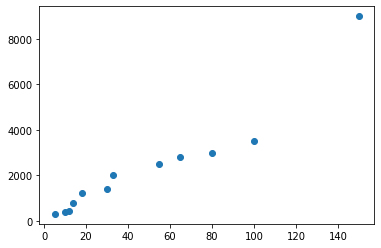

In [55]:
x=[5,10,12,14,18,30,33,55,65,80,100,150]
y=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]
plt.scatter(x,y)


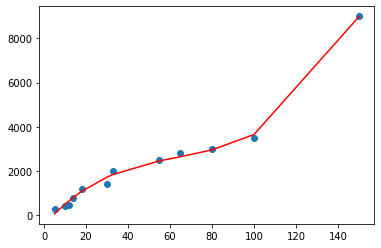

In [56]:
series_dict={'X':x,'y':y}
df=pd.DataFrame(series_dict)
X=df[['X']]
y=df[['y']]
# 3為多項式三次方
model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model.fit(X,y)

plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')


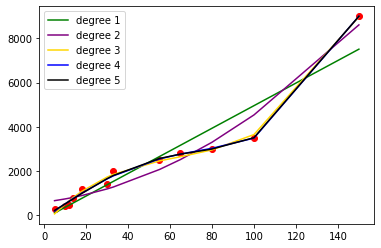

[0.9059983910519219,
 0.9585314218103534,
 0.9951555665160685,
 0.9966093112780661,
 0.9966678106695316]

In [117]:
scores=[]
colors=['green','purple','gold','blue','black']
plt.scatter(X,y,c='red')
for count,degree in enumerate([1,2,3,4,5]):
    model=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(X,y)
    scores.append(model.score(X,y))
    plt.plot(X,model.predict(X),color=colors[count],label='degree %d' %degree)

plt.legend(loc=2)
plt.show()
scores

## 3.多元線性回歸(多特徵)

### 多元回歸(簡單範例)

In [78]:

X,y=make_regression(n_samples=100, n_features=5, noise=20) # 製作100個樣本 五個特徵
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [83]:
regr=linear_model.LinearRegression() # 支援多元回歸
regr.fit(X_train, y_train)
# print(regr.intercept_)
# print(regr.coef_)
# print(regr.score(X_train,y_train))
#regr.predict(X_test)
regr.score(X_test,y_test)

0.9764529261984382

### 多元多項式回規(簡單範例)

In [84]:

# X,y=make_regression(n_samples=100, n_features=5, noise=20) # 製作100個樣本 五個特徵
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model.fit(X,y)
model.score(X_test,y_test)
#可以看出"多元多項是回歸"對於資料的擬和程度較好
#但可能缺失魯棒姓

0.9954725210435444

### 多元回歸(簡單房價範例)

In [91]:

size=[5,10,12,14,18,30,33,55,65,80,100,150]
distance=[50,20,70,100,200,150,30,50,70,35,40,20]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]
series_dict={'X1':size,'X2':distance,'y':price}
df=pd.DataFrame(series_dict)
input=df[['X1','X2']]
ans=df[['y']]
regr=linear_model.LinearRegression()
regr.fit(input, ans)

# 多元多項式
model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model.fit(input,ans)
print("Multivariable Regression",regr.score(input,ans))
print("Multivariable Regression" ,regr.coef_) 
# 可以看出對於房子大小(size)因子比距離市中心的因子來的重要
print("Polynomial Regression",model.score(input,ans))
# 依舊可以看出擬和效果還是regeression比較好

Multivariable Regression 0.9071864679091037
Multivariable Regression [[51.94345057  1.62218727]]
Polynomial Regression 0.9975740156734999


## 必免過擬和

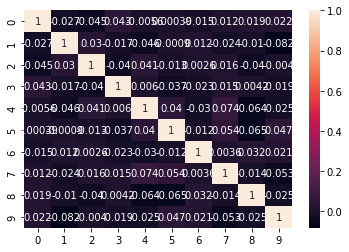

<Figure size 1440x1440 with 0 Axes>

In [104]:
X,y=make_regression(n_samples=1000, n_features=10, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
sns.heatmap(pd.DataFrame(X_train).corr(),annot=True)
plt.figure(figsize=(20,20))
plt.show()

In [105]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Training Score: ',regr.score(X_train,y_train))
print('Testing Score: ',regr.score(X_test,y_test))
#可以看到r2非常的好

Training Score:  0.997840770829091
Testing Score:  0.9975332045342185


In [107]:
reg_lasso = linear_model.Lasso(alpha=1)
reg_lasso.fit(X_train,y_train)
print('Training Score: ',reg_lasso.score(X_train,y_train))
print('Testing Score: ',reg_lasso.score(X_test,y_test))


Training Score:  0.997610974237517
Testing Score:  0.9971526989254855


In [109]:
reg_ridge = linear_model.Ridge(alpha=1)
reg_ridge.fit(X_train,y_train)
print('Training Score: ',reg_ridge.score(X_train,y_train))
print('Testing Score: ',reg_ridge.score(X_test,y_test))

Training Score:  0.997838505361871
Testing Score:  0.9975188836850427
